In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/kaggle/input/covid19-country-vaccination/country_vaccinations.csv")

# Preview data
print(df.head())
print(df.info())  

       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


cleaning data

In [5]:
# Keep only relevant columns
df = df[['country', 'date', 'total_vaccinations', 'people_vaccinated', 'vaccines']]

# Drop rows where 'total_vaccinations' is missing (main analysis column)
df = df.dropna(subset=['total_vaccinations'])

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

Top 10 Countries by Vaccination Rate

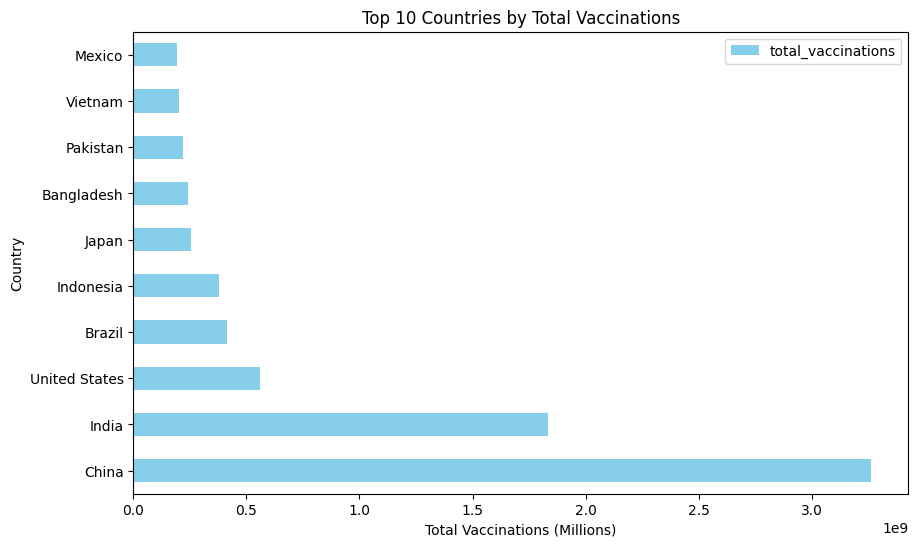

In [6]:
# Group by country and get the latest vaccination count
latest_data = df.sort_values('date').groupby('country').last()

# Sort by total vaccinations (descending)
top_10 = latest_data.nlargest(10, 'total_vaccinations')[['total_vaccinations']]

# Plot
top_10.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Countries by Total Vaccinations')
plt.xlabel('Total Vaccinations (Millions)')
plt.ylabel('Country')
plt.show()

Compare Vaccine Brands

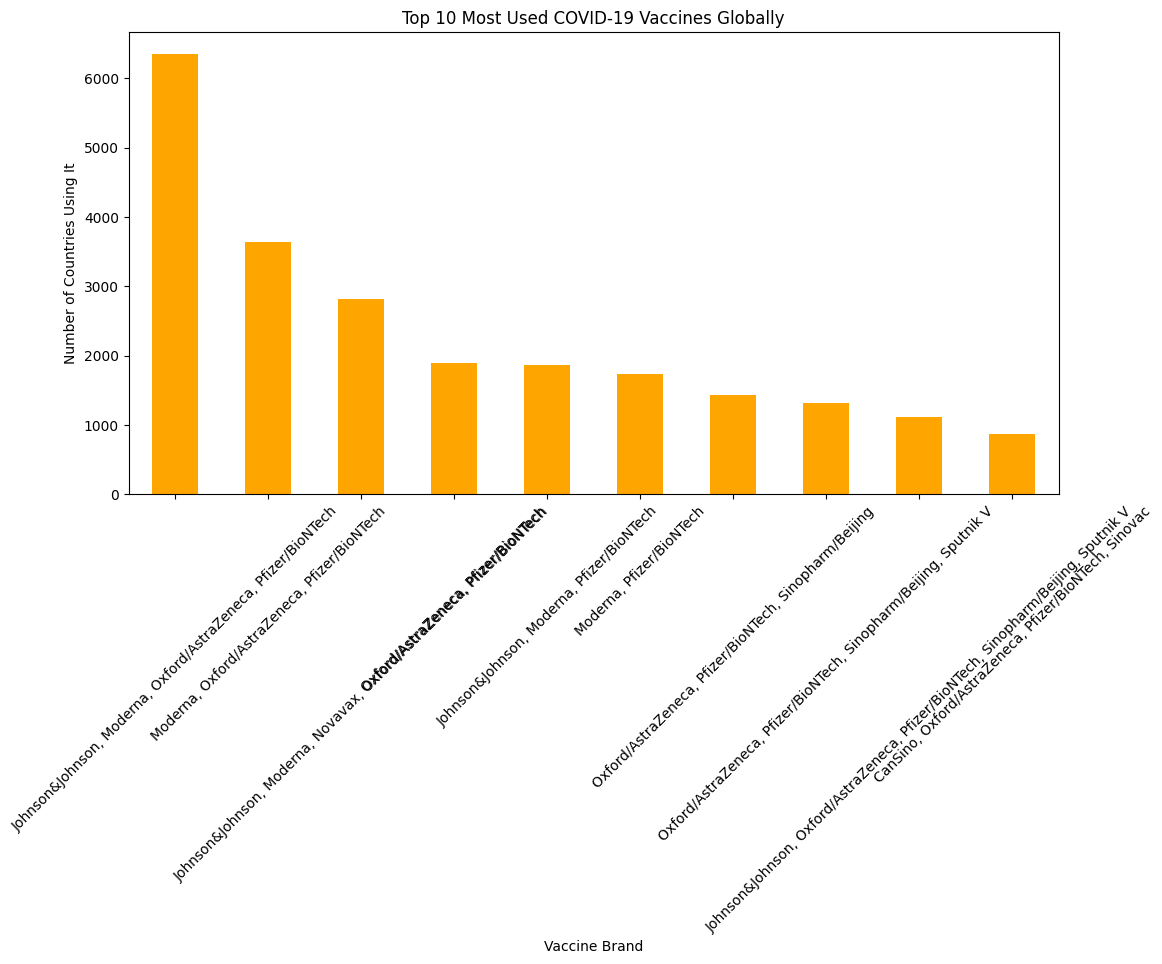

In [7]:
# Count how many countries use each vaccine brand
vaccine_counts = df['vaccines'].value_counts().head(10)

# Plot
vaccine_counts.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Top 10 Most Used COVID-19 Vaccines Globally')
plt.xlabel('Vaccine Brand')
plt.ylabel('Number of Countries Using It')
plt.xticks(rotation=45)
plt.show()

Time-Series Trend

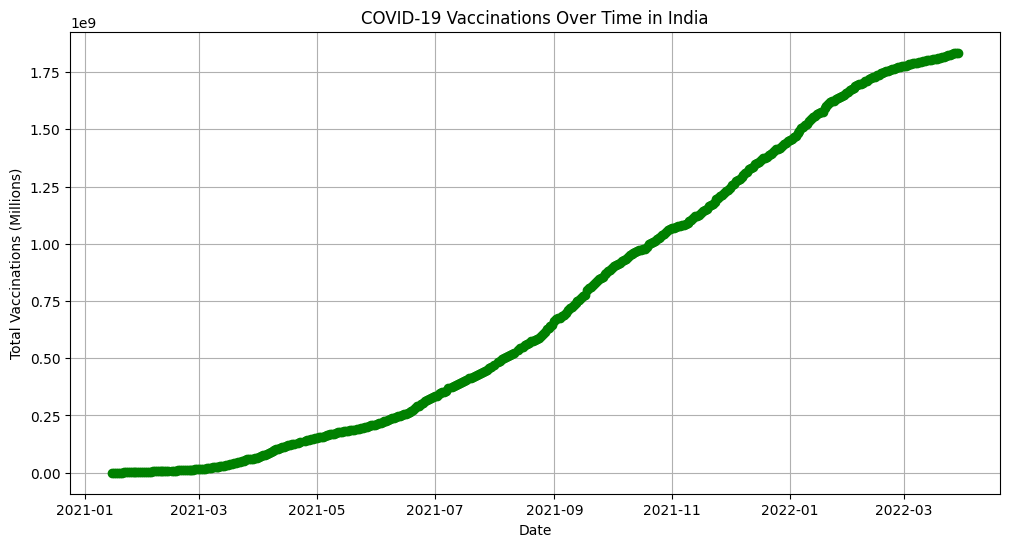

In [8]:
# Filter data for India
india = df[df['country'] == 'India']

# Plot
plt.figure(figsize=(12, 6))
plt.plot(india['date'], india['total_vaccinations'], marker='o', color='green')
plt.title('COVID-19 Vaccinations Over Time in India')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations (Millions)')
plt.grid()
plt.show()